In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import cmcrameri.cm as cmc
from matplotlib.ticker import MultipleLocator, LinearLocator, AutoMinorLocator

import os
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
import scienceplots
plt.style.use(["nature"])

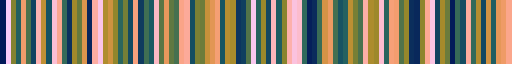

In [2]:
plt.rcParams["grid.linestyle"] =  ":"
plt.rcParams["axes.edgecolor"] = "gray"
plt.rcParams["axes.linewidth"] = 0.7

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
#sns.set_context("notebook", font_scale=1.2)
import scienceplots
plt.style.use(["nature"])

SMALL_SIZE = 6
MEDIUM_SIZE = 6.4
BIGGER_SIZE = 7
plt.rcParams["text.usetex"] = True
plt.rcParams["pdf.fonttype"] = 42

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"

cmap = cmc.batlowS
cmap

In [5]:
v = 4.02
load_path =  r".../analysis/tcav/plots/%s/" %v
try:
    os.mkdir(load_path)
except:
    pass

In [6]:
def make_plot(mu: list, mad: list, concepts: list, quantiles: list,  r_mu: float, r_mad: float, title: str):
    theta = np.linspace(0, 2 * np.pi, len(concepts), endpoint = False).tolist()
    theta += theta[:1]
    concepts += concepts[:1]
    mad += mad[:1]
    mu += mu[:1]
    quantiles += quantiles[:1]
    mad_l = [x - y for x, y in zip(mu,mad)]
    mad_h = [x + y for x,y in zip(mu,mad)]
    std_l  =[x - y for x, y in zip(mu,quantiles)]
    std_h = [x - y for x, y in zip(mu,quantiles)]

    r_mu = [r_mu] * len(mu)
    r_mad = [r_mad] * len(mu)
    r_mad_l = [r_mu[-1] - r_mad[-1]] * len(mu)
    r_mad_h = [r_mu[-1] + r_mad[-1]] * len(mu)

    
    fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
    plt.grid(linewidth=2)
    
    ## RANDOM
    #ax.fill_between(theta, r_mad_l, r_mad_h, alpha=0.1, color=cmap(3))
    ax.fill_between(theta, 0.0, r_mad_h, alpha=0.15, color=cmap(3))
    ax.plot(theta, r_mu, color=cmap(3),  alpha= 0.9, label="Random", 
            linewidth=3, marker="o", markersize = 12)
    ### CONCEPT
    #ax.fill_between(theta, std_l, std_h, alpha=0.3, color="#bbd3f3")
    ax.fill_between(theta, mad_l, mad_h, alpha=0.55, color=cmap(2))
    ax.plot(theta, mu, color=cmap(2), label="Concept Scores", 
            linewidth=3.5, marker="o", markersize=14) # concept
    plt.setp(ax.spines.values(),linewidth=0)
    plt.setp(ax.get_yticklabels(), fontsize=17)
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(theta), concepts)
    for i, (label, angle) in enumerate(zip(ax.get_xticklabels(), theta)):
        if i==0:
            label.set_size(0)
        else:
            label.set_size(label_font["size"])
        if angle in (0, np.pi):
            label.set_horizontalalignment("center")
        elif 0 < angle < np.pi:
            label.set_horizontalalignment("left")
        else:
            label.set_horizontalalignment("right")
        
    ax.set_ylim(0,1.05)
    ax.set_rlabel_position(180/(len(concepts)-1))
    ax.set_title(title, **title_font)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    return fig

In [7]:
to_use = ["mental", "sex_fm", "infection","income", "managers", "agriculture", "operators"]

## Sign-based

In [147]:
## load data 
with open(load_path + "agg_pos.pkl", "rb") as f:
    stat = pickle.load(f)
stat.keys()
concept_dict = {}
r_mu = stat["random"]["median"]
r_mad = stat["random"]["b_dev"] 
for c in to_use:
    concept_dict[c] = stat[c]

In [148]:
concepts = [ "Neural Diagnosis", "Mental and Behavioural Diagnosis", "High Income",  
             "Managerial Position", "Clerical Support workers", 
             "Work in Agriculture", "Infectious Decease"]
concepts = [k.replace("_", " ") for k in concept_dict.keys()]
mu =  [x["median"] for x in concept_dict.values()]
mad = [x["b_dev"]  for x in concept_dict.values()]
q = [x["std"] for x in concept_dict.values()]

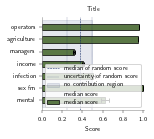

In [133]:
max_width_in_mm = 60
max_width_in_inches = max_width_in_mm / 25.4
max_height_in_mm = 85
max_height_in_inch = max_height_in_mm / 25.4

fig, ax = plt.subplots(1, figsize = (max_width_in_inches * 0.9, max_height_in_inch/1.75))

ax.barh(y = concepts, height = 0.5, width=mu,
        xerr=np.array(mad).T, capsize=1.5, 
        edgecolor="black", facecolor=cmap(31), ecolor="black", alpha=0., linewidth=0.7, label="median score")

ax.axvline(r_mu, c=cmap(0), linestyle="--", linewidth=0.5, label ="median of random score")
ax.axvline(r_mu + r_mad, c=cmap(0), linestyle="dashed", linewidth=0.2, label="uncertainty of random score")
ax.axvline(r_mu - r_mad, c=cmap(0), linestyle="dashed", linewidth=0.2)

ax.fill_betweenx(y=[ax.get_ylim()[0], ax.get_ylim()[1]], x1=r_mu + r_mad, x2=0, color=cmap(0), alpha=0.1, label="no contribution region")

### data
ax.barh(y = concepts, height = 0.5, width=mu,
        xerr=np.array(mad).T, capsize=2, 
        edgecolor="black", facecolor=cmap(31), ecolor="black", alpha=1., linewidth=0.7, label="median score", 
        error_kw={'elinewidth':1, 'ecolor':'black'} )

ax.tick_params(axis= "x", which="major", width=0.4, length = 3, direction="out")
ax.tick_params(axis= "y", which="major", width=0.4, length = 3, direction="out")
ax.tick_params(axis= "y", which="minor", width=0, length =0)
ax.set_xlim([0,1.01])

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.set_ylim(ax.get_ylim()[0]+0.1, ax.get_ylim()[1]-0.1)

ax.tick_params(which="both", top=False, right=False)
ax.set_title("Title")
ax.set_xlabel("Score")
ax.legend()

sns.despine()
plt.tight_layout()
fig.savefig(load_path + "tcav_simple1.pdf", format="pdf")
plt.show()

In [ ]:
concepts = [k for k in concept_dict.keys()]
mu =  [x["median"] for x in concept_dict.values()]
mad = [x["b_dev"]  for x in concept_dict.values()]
q = [x["std"] for x in concept_dict.values()]

title = "Concept Influences on the increase of the 'Death' outcome"

fig = make_plot(mu=mu, mad=mad, r_mu = r_mu, r_mad = r_mad, title=title, concepts=concepts, quantiles = q)
plt.tight_layout()
plt.show()

fig.savefig(load_path + "tcav_d.svg", format="svg")

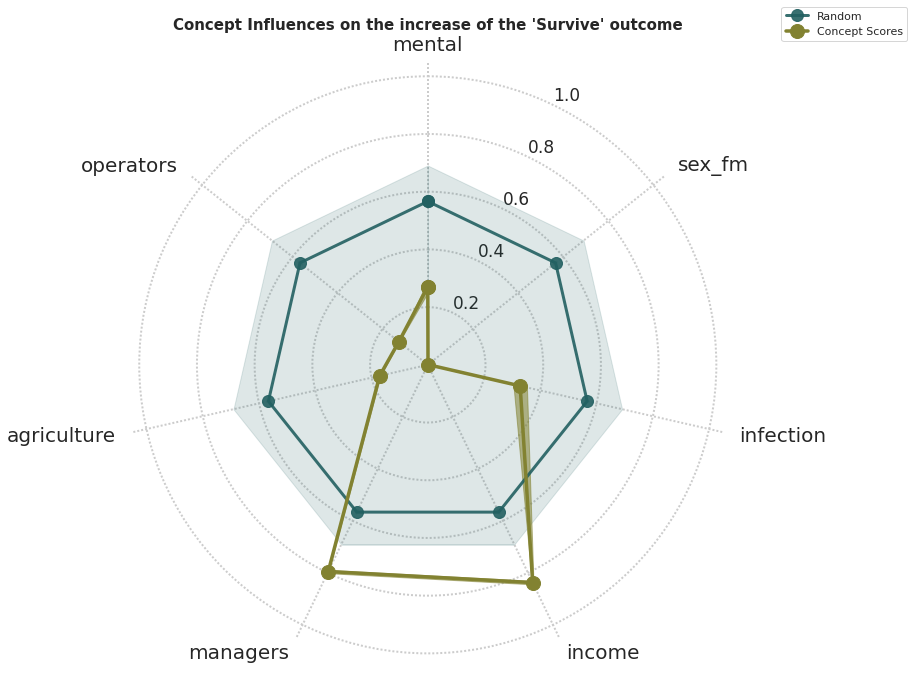

In [501]:
## load data 
with open(load_path + "agg_neg.pkl", "rb") as f:
    stat = pickle.load(f)
stat.keys()
concept_dict = {}
r_mu = stat["random"]["median"]
r_mad = stat["random"]["b_dev"]
for c in to_use:
    concept_dict[c] = stat[c]
    
    
concepts = [k for k in concept_dict.keys()]
mu =  [x["median"] for x in concept_dict.values()]
mad = [x["b_dev"]  for x in concept_dict.values()]
q = [x["std"] for x in concept_dict.values()]

title = "Concept Influences on the increase of the 'Survive' outcome"

fig = make_plot(mu=mu, mad=mad, r_mu = r_mu, r_mad = r_mad, title=title, concepts=concepts, quantiles=q)
plt.tight_layout()
plt.show()

fig.savefig(load_path + "tcav_s.svg", format="svg")


## Magnitude-based

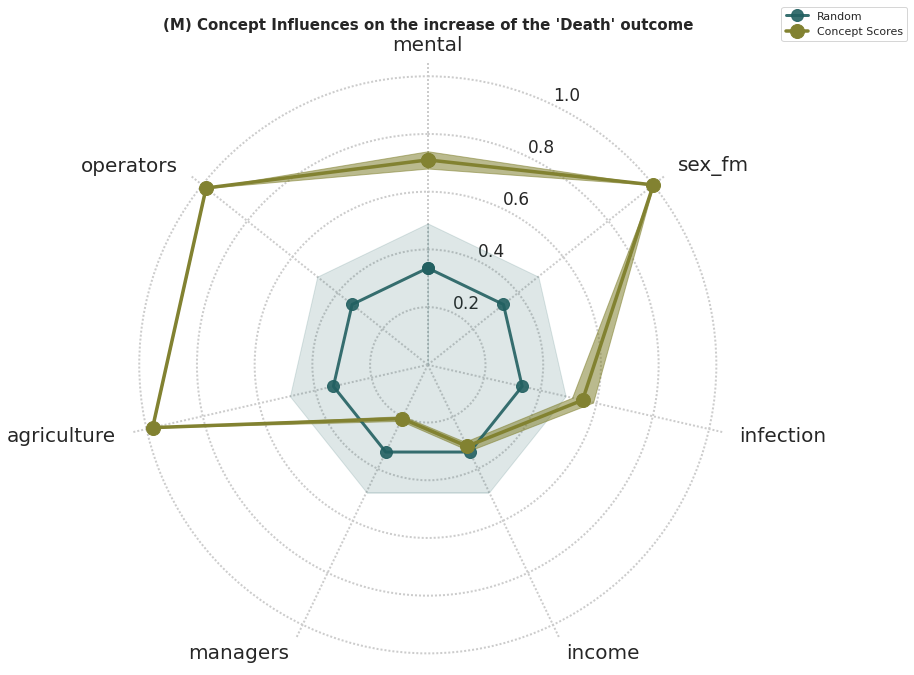

In [502]:
# concepts = [ "Neural Diagnosis", "Mental and Behavioural Diagnosis", "High Income",  
#             "Managerial Position", "Clerical Support workers", 
#             "Work in Agriculture", "Infectious Decease"]
## load data 
with open(load_path + "M_agg_pos.pkl", "rb") as f:
    stat = pickle.load(f)
stat.keys()
concept_dict = {}
r_mu = stat["random"]["median"]
r_mad = stat["random"]["b_dev"] 
for c in to_use:
    concept_dict[c] = stat[c]

concepts = [k for k in concept_dict.keys()]
mu =  [x["median"] for x in concept_dict.values()]
mad = [x["b_dev"]  for x in concept_dict.values()]
q = [x["std"] for x in concept_dict.values()]

title = "(M) Concept Influences on the increase of the 'Death' outcome"

fig = make_plot(mu=mu, mad=mad, r_mu = r_mu, r_mad = r_mad, title=title, concepts=concepts, quantiles = q)
plt.tight_layout()
plt.show()

fig.savefig(load_path + "m_tcav_d.svg", format="svg")

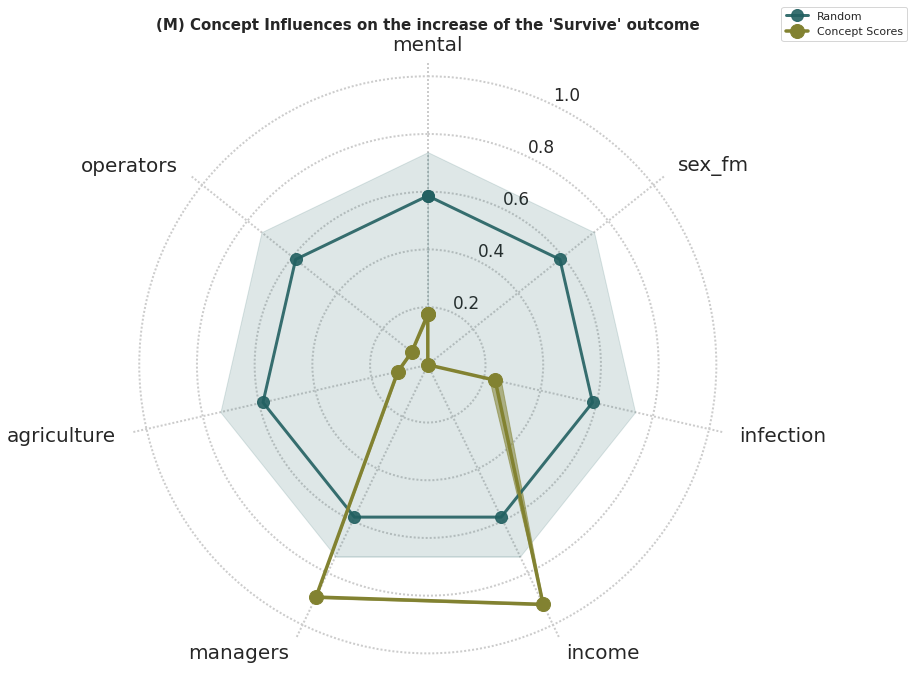

In [503]:
## load data 
with open(load_path + "M_agg_neg.pkl", "rb") as f:
    stat = pickle.load(f)
stat.keys()
concept_dict = {}
r_mu = stat["random"]["median"]
r_mad = stat["random"]["b_dev"]
for c in to_use:
    concept_dict[c] = stat[c]
    
    
concepts = [k for k in concept_dict.keys()]
mu =  [x["median"] for x in concept_dict.values()]
mad = [x["b_dev"]  for x in concept_dict.values()]
q = [x["std"] for x in concept_dict.values()]

title = "(M) Concept Influences on the increase of the 'Survive' outcome"

fig = make_plot(mu=mu, mad=mad, r_mu = r_mu, r_mad = r_mad, title=title, concepts=concepts, quantiles=q)
plt.tight_layout()
plt.show()

fig.savefig(load_path + "M_tcav_s.svg", format="svg")
